C:\Users\25759\AppData\Local\Temp\ipykernel_20892\1462409850.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Firm_attr['Product_Code'] = firm_product


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['2.1.2.1', '2.1.2.2', '2.1.2.3', '2.1.2.4']
[]
[]
[]
[]
[]
[]
[]
[]
['2.1.3.1', '2.1.3.2', '2.1.3.3', '2.1.3.4', '2.1.3.5', '2.1.3.6', '2.1.3.7']
['2.1.4.1', '2.1.4.2']
['2.3.1', '2.3.2', '2.3.3']
[]
[]
[]
[]
['2.3.1', '2.3.2', '2.3.3']
[]
[]
[]
[]
[]
[]
[]
[]
['2.1.1.1', '2.1.1.2', '2.1.1.3', '2.1.1.4', '2.1.1.5']
['2.1.3.1', '2.1.3.2', '2.1.3.3', '2.1.3.4', '2.1.3.5', '2.1.3.6', '2.1.3.7']
['2.1.4.1', '2.1.4.2']
['2.3.1', '2.3.2', '2.3.3']
[]
[]
[]
[]
[]
[]
[]
['2.3.1', '2.3.2', '2.3.3']
[]
[]
['2.1.3.1', '2.1.3.2', '2.1.3.3', '2.1.3.4', '2.1.3.5', '2.1.3.6', '2.1.3.7']
[]
[]
[]
[]
[]
['2.1.4.1', '2.1.4.2']
[]
['2.1.2.1', '2.1.2.2', '2.1.2.3', '2.1.2.4']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['2.1.1.1', '2.1.1.2', '2.1.1.3', '2.1.1.4', '2.1.1.5']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['2.1.4.1', '2.1.4.2']
[]
[]
[]
[]
[]
['2.1.2.1', '2.1.2.2', '2.1.2.3', '2.1.2.4']
[]
[]
[]
[]
[]
[]
['2.1.2.1', '2.1.2.2', '2.1.2.3', '2.1.2.4

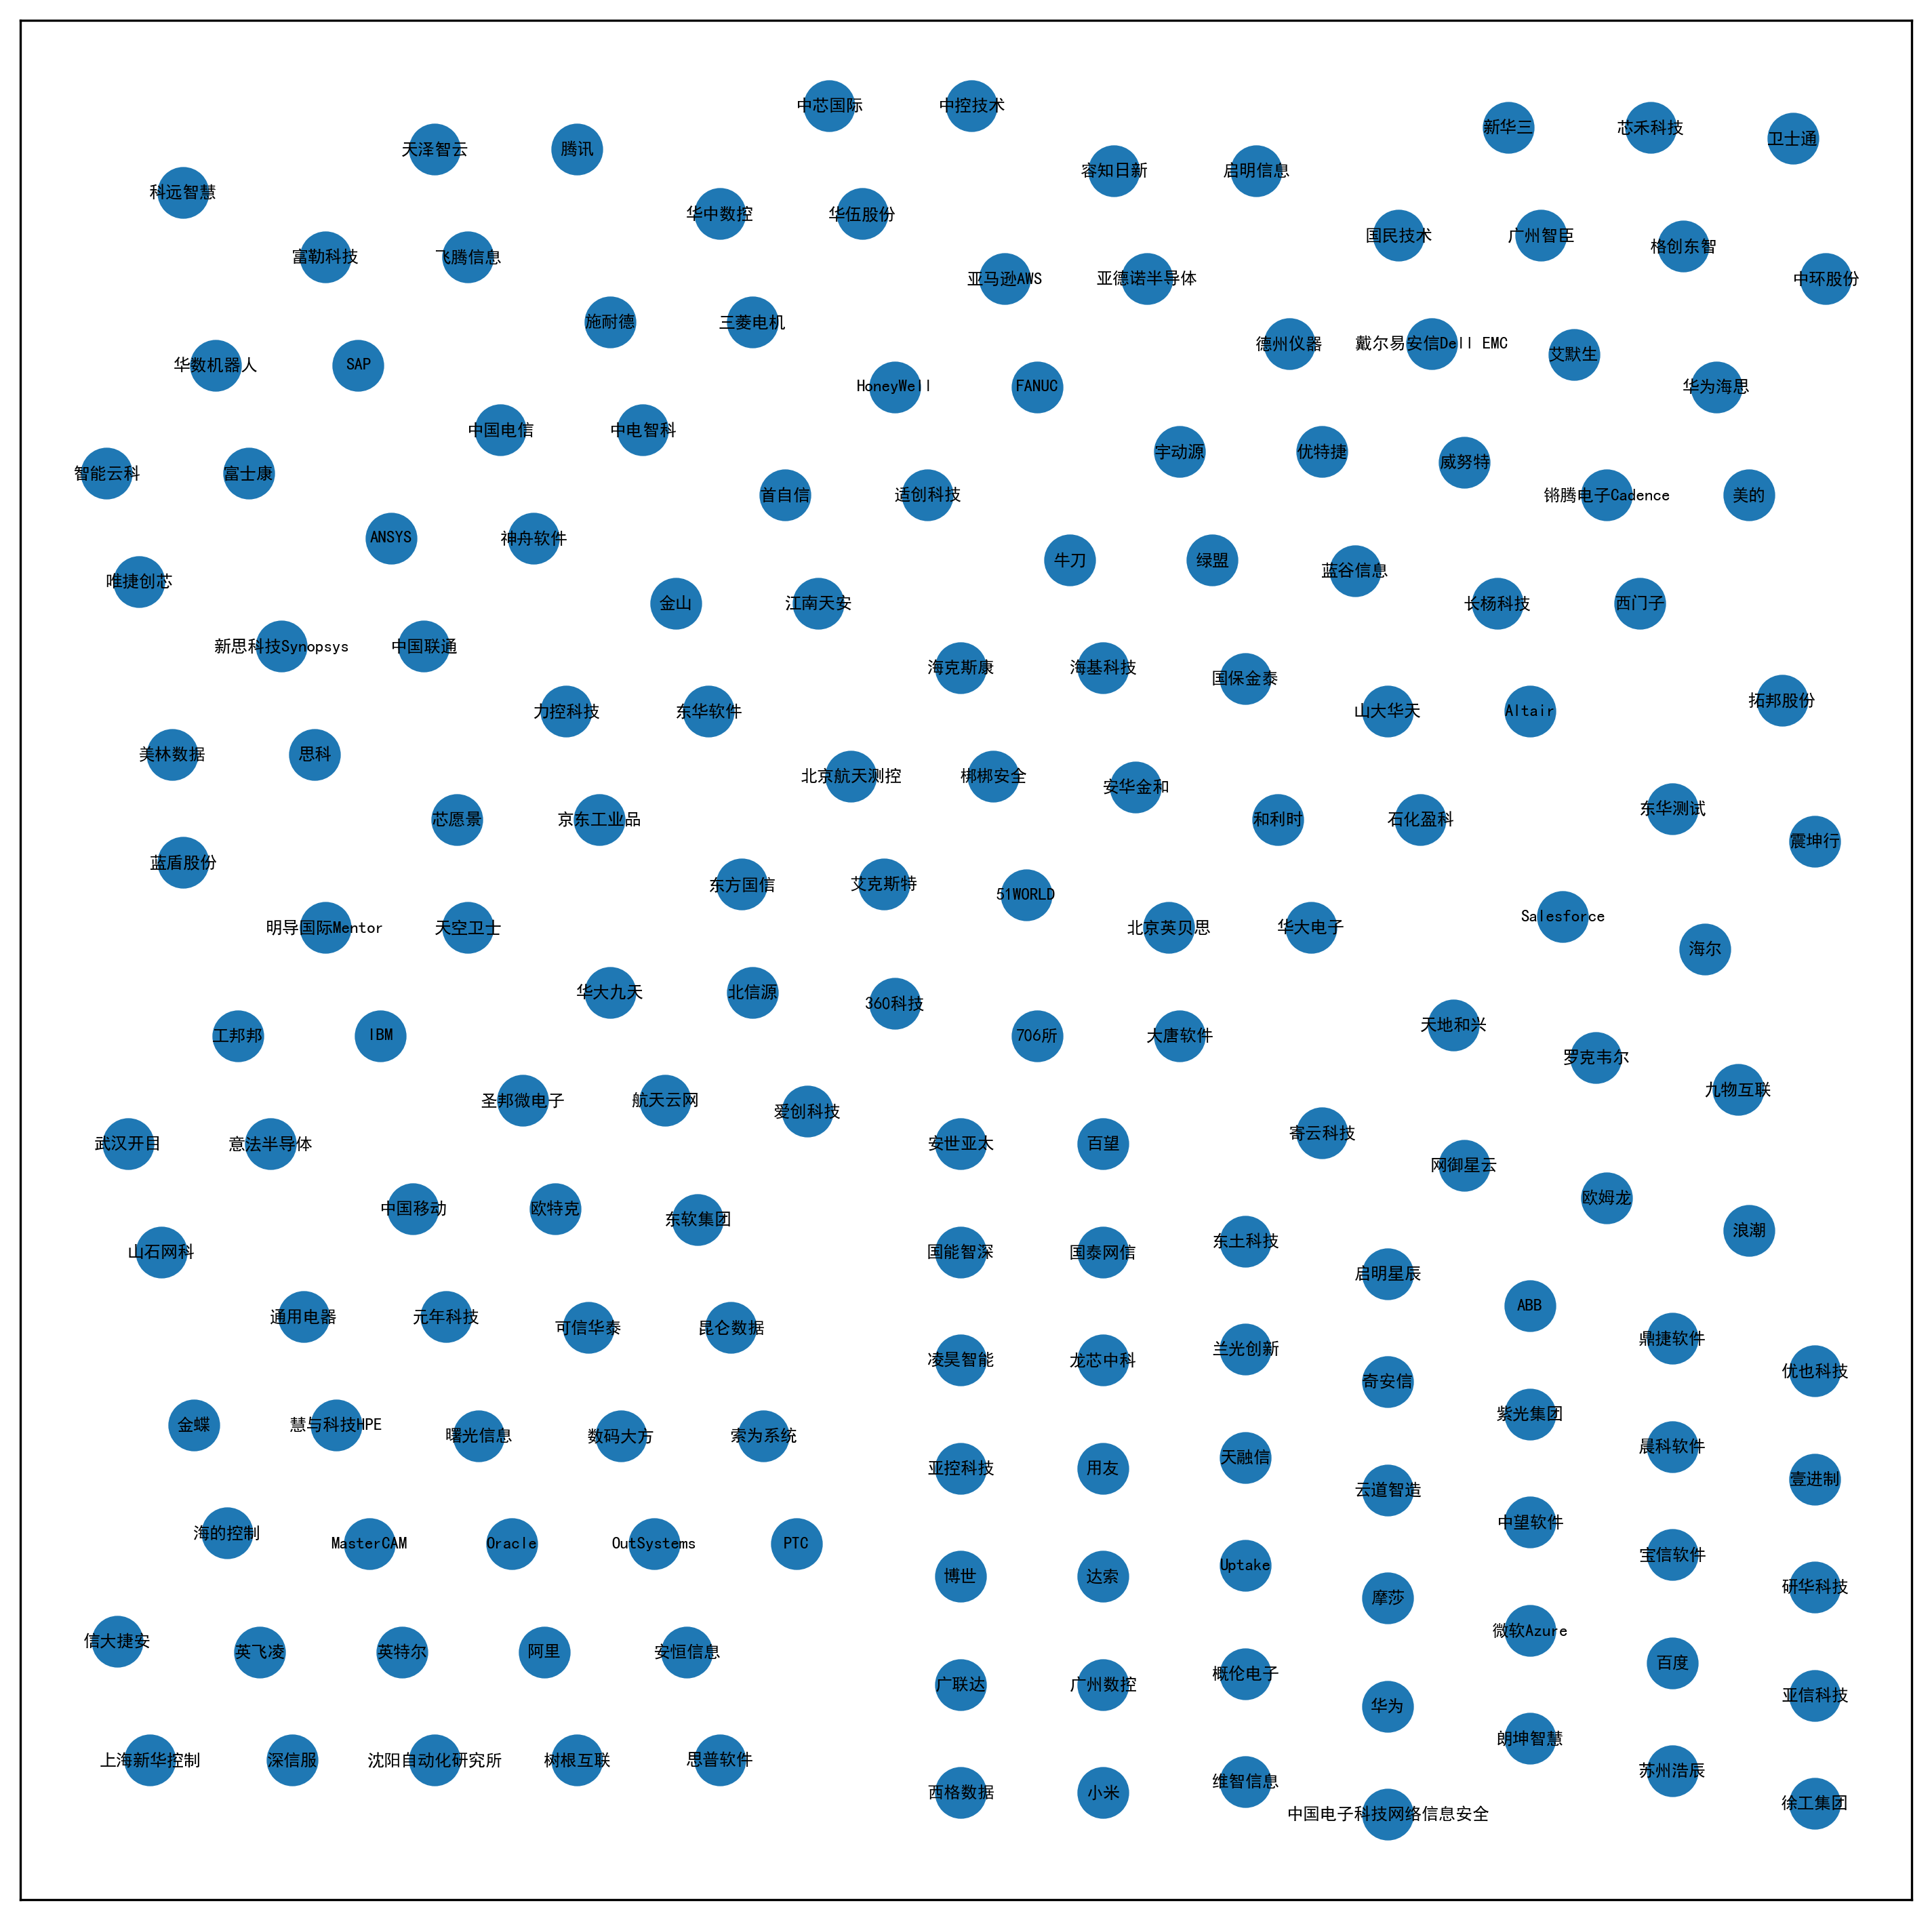

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'

# init graph bom
BomNodes = pd.read_csv('BomNodes.csv', index_col=0)
BomNodes.set_index('Code', inplace=True)
BomCateNet = pd.read_csv('BomCateNet.csv', index_col=0)
BomCateNet.fillna(0, inplace=True)

G_bom = nx.from_pandas_adjacency(BomCateNet, create_using=nx.MultiDiGraph())

bom_labels_dict = {}
for code in G_bom.nodes:
    bom_labels_dict[code] = BomNodes.loc[code].to_dict()
nx.set_node_attributes(G_bom, bom_labels_dict)

# init graph firm
Firm = pd.read_csv("Firm_amended.csv")
Firm.fillna(0, inplace=True)
Firm_attr = Firm[["Code","Name","Type_Region"]]
firm_product = []
for _, row in Firm.loc[:,'1':].iterrows():
    firm_product.append(row[row==1].index.to_list())
Firm_attr['Product_Code'] = firm_product
Firm_attr.set_index('Code')

G_Firm =nx.MultiDiGraph()
G_Firm.add_nodes_from(Firm["Code"])

firm_labels_dict = {}
for code in G_Firm.nodes:
    firm_labels_dict[code] = Firm_attr.loc[code].to_dict()
nx.set_node_attributes(G_Firm, firm_labels_dict)

# add edge to G_firm according to G_bom
product_codes = nx.get_node_attributes(G_Firm, 'Product_Code')
for node in nx.nodes(G_Firm):
    # print(product_codes[node])
    for product_code in product_codes[node]:
        # print(product_code)
        print(list(G_bom.neighbors(product_code)))

# print graph
pos = nx.nx_agraph.graphviz_layout(G_Firm, prog="twopi", args="")
node_labels = nx.get_node_attributes(G_Firm, 'Name')
plt.figure(figsize=(12, 12), dpi=300)
nx.draw_networkx_nodes(G_Firm, pos)
nx.draw_networkx_edges(G_Firm, pos)
nx.draw_networkx_labels(G_Firm, pos, labels = node_labels, font_size=6)
plt.show()

In [7]:
G_bom.nodes()

NodeView(('1', '1.1', '1.1.1', '1.1.2', '1.1.3', '1.2', '1.2.1', '1.2.2', '1.2.3', '1.3', '1.3.1', '1.3.1.1', '1.3.1.2', '1.3.1.3', '1.3.1.4', '1.3.1.5', '1.3.1.6', '1.3.1.7', '1.3.2', '1.3.2.1', '1.3.3', '1.3.3.1', '1.3.3.2', '1.3.3.3', '1.3.3.4', '1.3.3.5', '1.3.3.6', '1.3.3.7', '1.3.4', '1.3.4.1', '1.3.4.2', '1.3.4.3', '1.3.5', '1.3.5.1', '1.4', '1.4.1', '1.4.1.1', '1.4.1.2', '1.4.1.3', '1.4.1.4', '1.4.1.5', '1.4.2', '1.4.2.1', '1.4.2.2', '1.4.2.3', '1.4.2.4', '1.4.2.5', '1.4.2.6', '1.4.2.7', '1.4.3', '1.4.3.1', '1.4.3.2', '1.4.3.3', '1.4.3.4', '1.4.3.5', '1.4.3.6', '1.4.4', '1.4.4.1', '1.4.4.2', '1.4.4.3', '1.4.4.4', '1.4.4.5', '1.4.5', '1.4.5.1', '1.4.5.2', '1.4.5.3', '1.4.5.4', '1.4.5.5', '1.4.5.6', '1.4.5.7', '1.4.5.8', '1.4.5.9', '2', '2.1', '2.1.1', '2.1.1.1', '2.1.1.2', '2.1.1.3', '2.1.1.4', '2.1.1.5', '2.1.2', '2.1.2.1', '2.1.2.2', '2.1.2.3', '2.1.2.4', '2.1.3', '2.1.3.1', '2.1.3.2', '2.1.3.3', '2.1.3.4', '2.1.3.5', '2.1.3.6', '2.1.3.7', '2.1.4', '2.1.4.1', '2.1.4.1.1', '2.1

In [10]:
list(G_bom.neighbors('1'))

['1.1', '1.2', '1.3', '1.4', '2']